In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ES = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

In [5]:
ES

,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,"WONTON FOOD, INC.",DONALD LAU,donaldlau@wontonfood.com,7186286868,220-222 MOORE STREET,Brooklyn,NY,11206,Manufacturing,"MFG. PASTA, EGGROLL SKINS",...,965843.58,Brooklyn,40.704425,-73.936010,301.0,34.0,485.0,3071539.0,3.031090e+09,Bushwick South
446,Wood Works,Gordon Brawm,brawnworks@gmail.com,9179404950,162 Cook Street,Brooklyn,NY,11206,Manufacturing,Installer of wood furniture,...,3585.40,Brooklyn,40.702869,-73.936466,301.0,34.0,485.0,3071625.0,3.031230e+09,Bushwick South
447,"WorldWide Plumbing Supply, Inc.",Surie Lefkowitz,sheidya@wwps.com,7188533002,125 Lake Avenue,Staten Island,NY,10303,Manufacturing,"Plumbing Fixtures, Parts & Supplies, Plumbers",...,20487.73,Staten Island,40.633518,-74.150942,501.0,49.0,239.0,5107122.0,5.011610e+09,Mariner's Harbor-Arlington-Port Ivory-Granitev...
448,WUD Furniture LLC,Keren Springer,keren@wudfurniture.com,7184867952,1102 Atlantic Avenue,Brooklyn,NY,11238,Manufacturing,"We make handcrafted furniture, surfaces, lighting",...,12287.32,Brooklyn,40.679518,-73.956819,308.0,35.0,305.0,3027572.0,3.011260e+09,Crown Heights North


In [6]:
NTA_count = ES.groupby('NTA')['Company Name'].nunique()

In [7]:
Qualified_NTA = ES[ES['NTA'].isin(NTA_count[NTA_count>=5].index.tolist())]

In [10]:
Average_Saving = Qualified_NTA.groupby('NTA').mean()['Total Savings'] #average total savings for each NTA

In [22]:
Total_jobs = Qualified_NTA.groupby('NTA').sum()['Job created'] # total jobs created for each NTA

In [23]:
Total_jobs

NTA
Battery Park City-Lower Manhattan                    0.0
Bushwick South                                      10.0
Carroll Gardens-Columbia Street-Red Hook             0.0
College Point                                        2.0
Crown Heights North                                  0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill     0.0
East New York                                       15.0
East Williamsburg                                    0.0
Greenpoint                                           0.0
Hunters Point-Sunnyside-West Maspeth                 0.0
Hunts Point                                         12.0
Manhattanville                                       0.0
Maspeth                                             10.0
Mott Haven-Port Morris                              10.0
Queensbridge-Ravenswood-Long Island City             0.0
SoHo-TriBeCa-Civic Center-Little Italy               0.0
Springfield Gardens South-Brookville                 0.0
Steinway                   

In [12]:
Average_Saving

NTA
Battery Park City-Lower Manhattan                   469890.796667
Bushwick South                                       26140.455000
Carroll Gardens-Columbia Street-Red Hook             24337.390000
College Point                                        17159.372857
Crown Heights North                                   4036.298889
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill     59950.340000
East New York                                        48433.093333
East Williamsburg                                    13990.626364
Greenpoint                                            9753.649286
Hunters Point-Sunnyside-West Maspeth                 23931.398933
Hunts Point                                          39246.016154
Manhattanville                                        2760.888889
Maspeth                                               6658.283333
Mott Haven-Port Morris                               17843.937857
Queensbridge-Ravenswood-Long Island City             61830.770625
SoHo-T

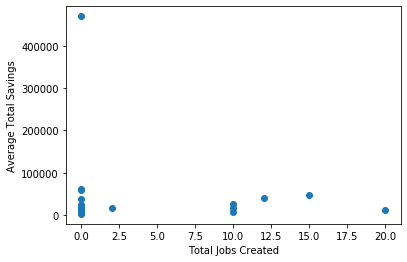

In [24]:
plt.scatter(Total_jobs, Average_Saving)
#scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
plt.xlabel("Total Jobs Created")
plt.ylabel("Average Total Savings")
plt.show()

In [25]:
import numpy as np

In [26]:
log_savings = np.log(Average_Saving)

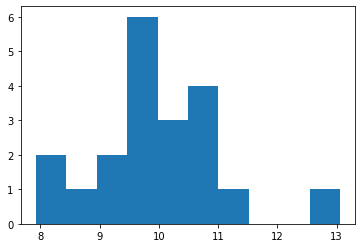

In [29]:
plt.hist(log_savings)
plt.show() #histogram of the log of the average total savings

In [33]:
ES["Effective Date"] = pd.to_datetime(ES["Effective Date"])

In [34]:
ES['Effective Date']

0     2005-03-04
1     2008-04-02
2     2015-01-05
3     2020-02-03
4     2017-06-30
         ...    
445   2008-12-09
446   2017-12-05
447   2018-08-03
448   2016-01-26
449   2019-10-03
Name: Effective Date, Length: 450, dtype: datetime64[ns]

In [63]:
months = pd.DatetimeIndex(Qualified_NTA['Effective Date']).month

In [64]:
jobs = Qualified_NTA['Job created']

In [65]:
jobs

1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
443     NaN
444     NaN
445    10.0
446     NaN
448     NaN
Name: Job created, Length: 306, dtype: float64

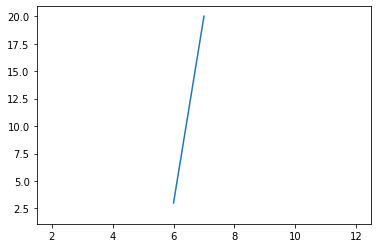

In [68]:
plt.plot(months,jobs)
plt.show()